In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-03.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

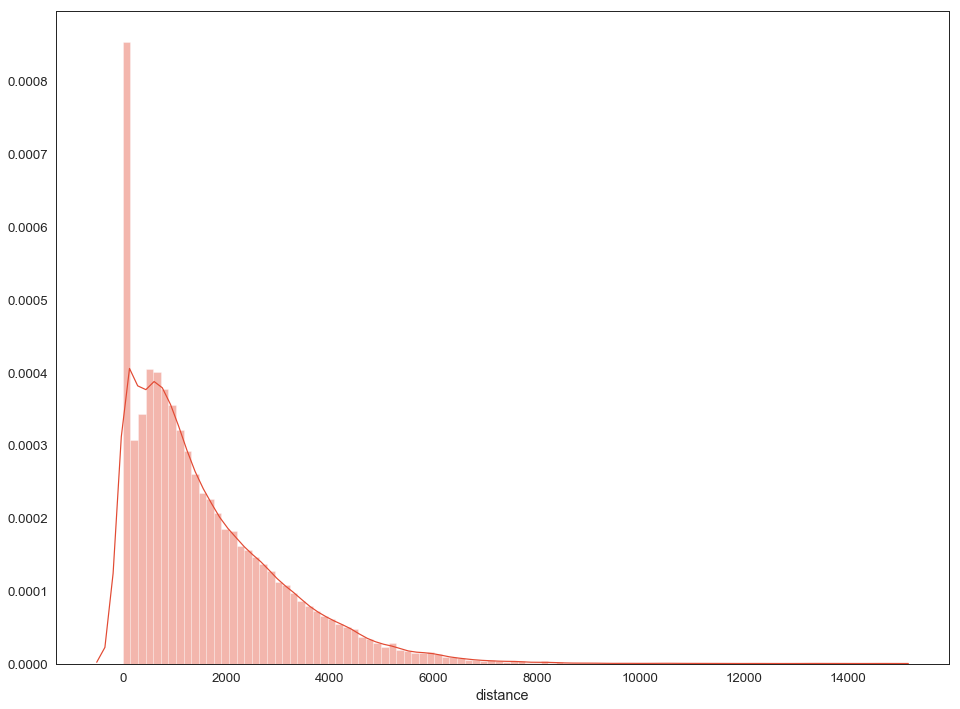

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 100)

### Droping 1 minute rides

In [5]:
dfc = df[df.ride_time != 1]

In [6]:
distance = dfc["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,2773.834779,-1.213491e+06,inf,4.448769e-08
gamma,2401.254592,-1.206744e+06,inf,5.188428e-08
burr,2326.484069,-1.172811e+06,inf,1.122849e-07
norm,4036.612324,-1.120363e+06,inf,3.706256e-07
lognorm,2392.725334,-1.067661e+06,inf,1.229539e-06


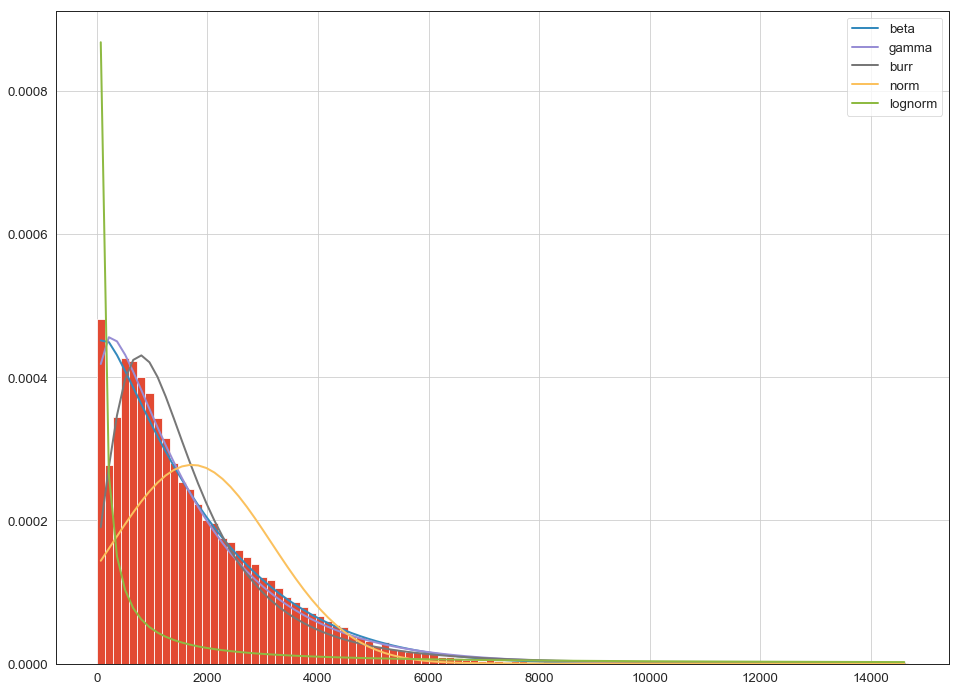

In [7]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [8]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.0602189118818004,
  8.343248354366931,
  -0.010159215182772345,
  15229.578369069153)}

In [9]:
f.get_best(method = 'aic')

{'burr': (4.00444841534307,
  229.4953449264736,
  -2537.293359439811,
  903.9373180793622)}

In [10]:
f.get_best(method = 'bic')

{'beta': (1.0602189118818004,
  8.343248354366931,
  -0.010159215182772345,
  15229.578369069153)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,2773.834779,-1.213491e+06,inf,4.448769e-08
burr,2326.484069,-1.172811e+06,inf,1.122849e-07
norm,4036.612324,-1.120363e+06,inf,3.706256e-07
bradford,1954.846183,-1.086400e+06,inf,8.026431e-07
alpha,3271.422786,-1.057112e+06,inf,1.563151e-06


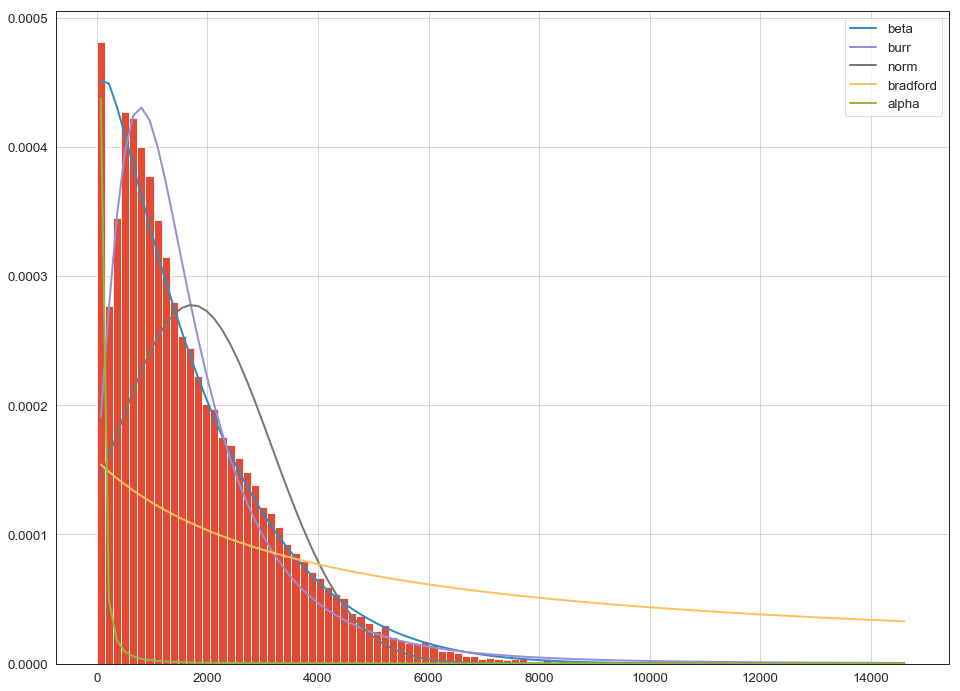

In [11]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,2881.533976,-1.213723e+06,inf,4.426474e-08
chi2,2401.249971,-1.206748e+06,inf,5.188004e-08
expon,2345.688192,-1.181823e+06,inf,9.150791e-08
dgamma,2840.073830,-1.130553e+06,inf,2.938399e-07
cosine,2083.663793,-1.071021e+06,inf,1.139286e-06


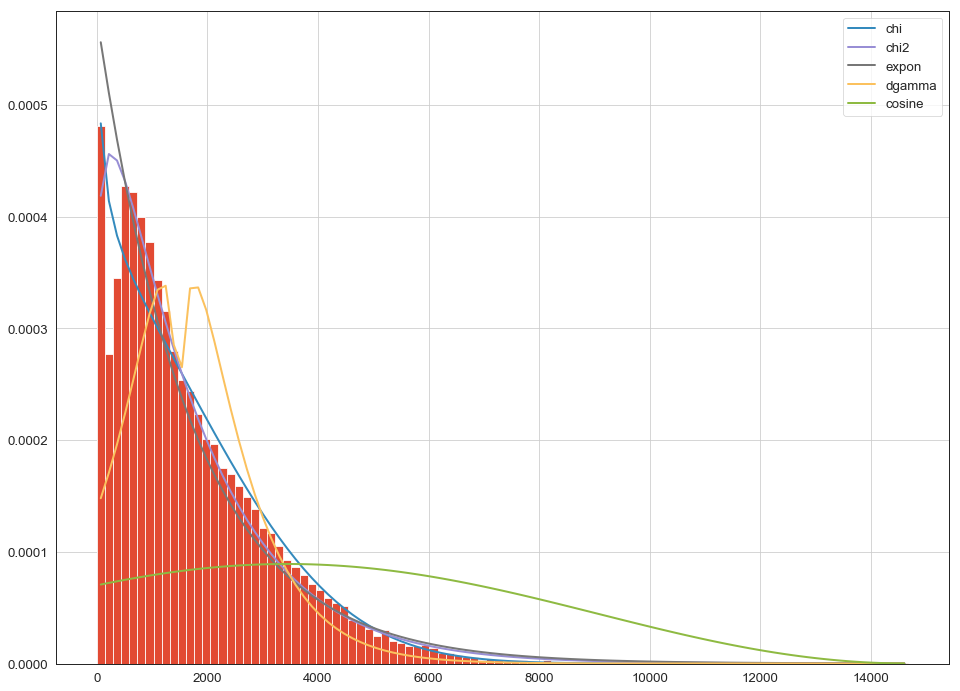

In [12]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,2401.254592,-1.206744e+06,inf,5.188428e-08
exponnorm,2353.007902,-1.180283e+06,inf,9.474904e-08
fatiguelife,2329.910081,-1.094182e+06,inf,6.723674e-07
f,2422.662968,-1.068082e+06,inf,1.217516e-06
fisk,2440.814714,-1.067642e+06,inf,1.230063e-06


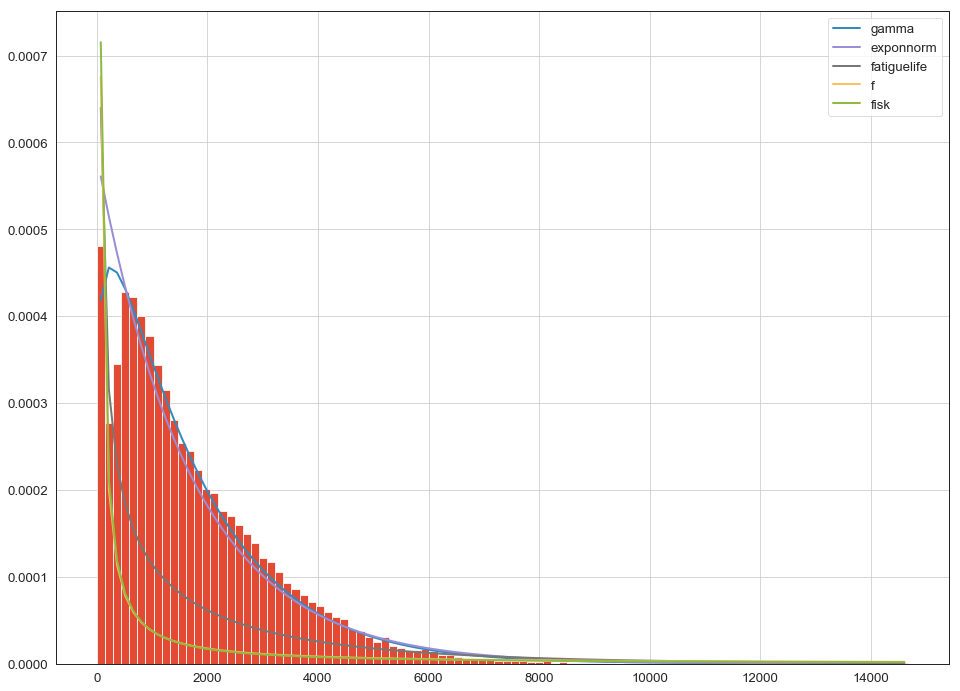

In [13]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,2351.559958,-1.181794e+06,inf,9.150272e-08
loggamma,3974.925395,-1.119955e+06,inf,3.739912e-07
levy,2142.837336,-1.118782e+06,inf,3.842007e-07
lognorm,2392.725334,-1.067661e+06,inf,1.229539e-06
gengamma,2324.207500,-1.049090e+06,inf,1.875825e-06


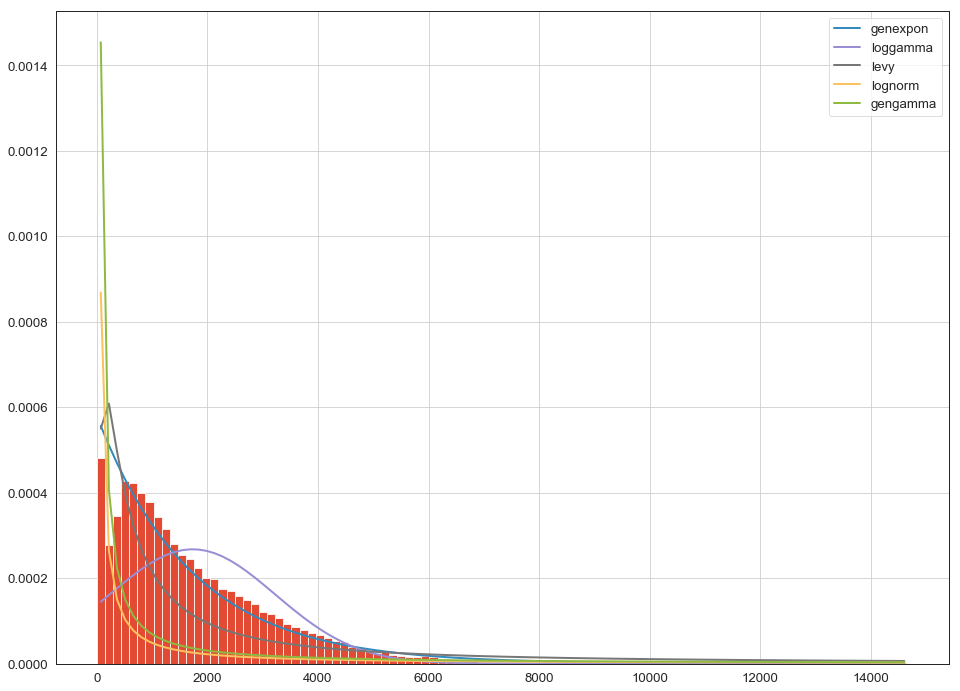

In [14]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,2401.254610,-1.206744e+06,inf,5.188428e-08
logistic,2901.636505,-1.127034e+06,inf,3.184192e-07
t,2635.217538,-1.123163e+06,inf,3.476614e-07
powerlaw,2009.099814,-1.097792e+06,inf,6.193273e-07
pareto,2330.284466,-1.055358e+06,inf,1.626826e-06


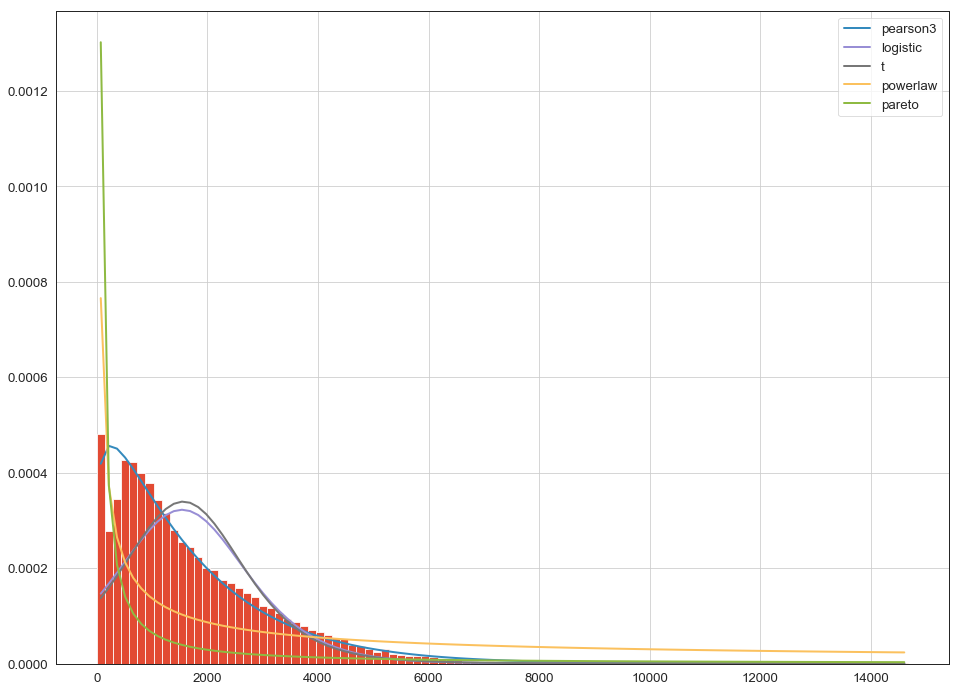

In [15]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
chi,2881.533976,-1.213723e+06,inf,4.426474e-08
beta,2773.834779,-1.213491e+06,inf,4.448769e-08
gamma,2401.254592,-1.206744e+06,inf,5.188428e-08
pearson3,2401.254610,-1.206744e+06,inf,5.188428e-08
genexpon,2351.559958,-1.181794e+06,inf,9.150272e-08


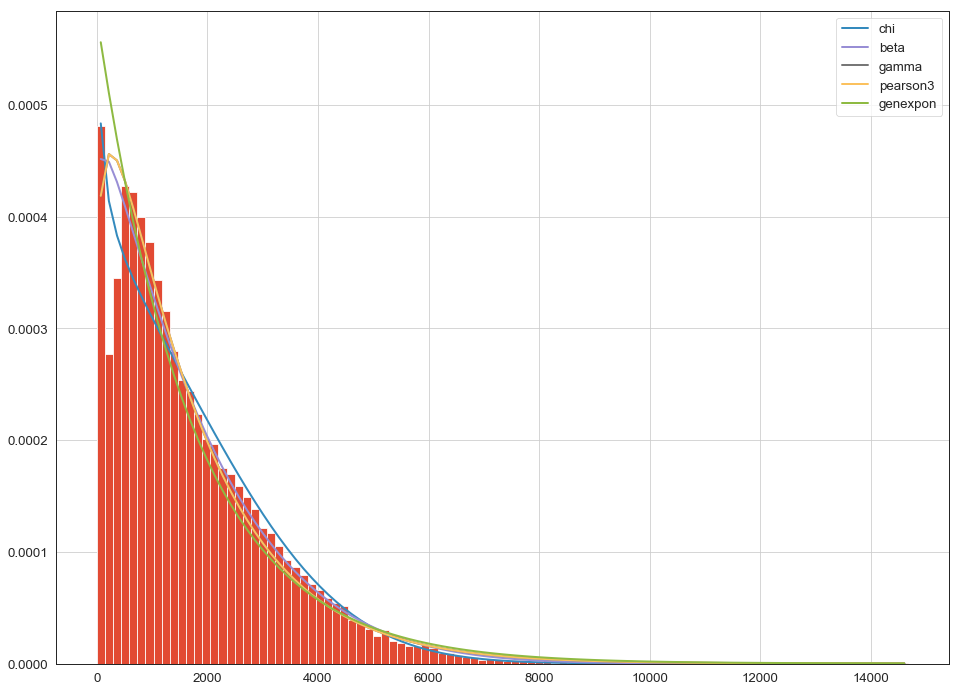

In [38]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

### 5 best distributions without 1 min drop

In [17]:
distance2 = df["distance"].values

,aic,bic,kl_div,sumsquare_error
chi,2871.827409,-1.294286e+06,inf,8.113794e-08
beta,2752.396066,-1.280087e+06,inf,1.092061e-07
gamma,2369.284765,-1.270170e+06,inf,1.344375e-07
pearson3,2400.567700,-1.265896e+06,inf,1.470229e-07
genexpon,2572.899564,-1.262963e+06,inf,1.562644e-07


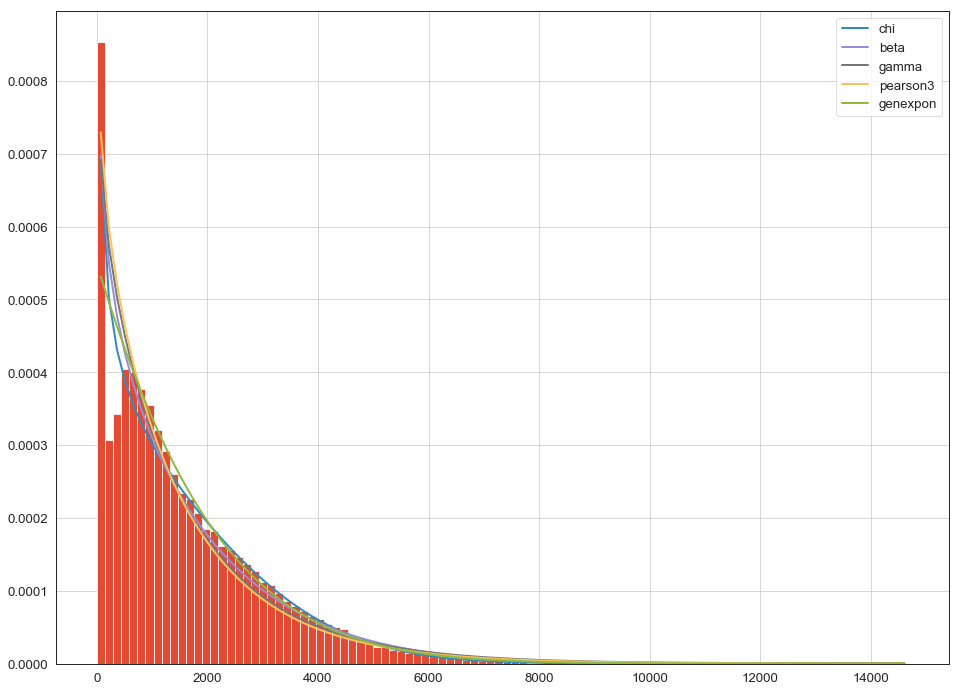

In [39]:
f = Fitter(distance2,
           distributions=['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

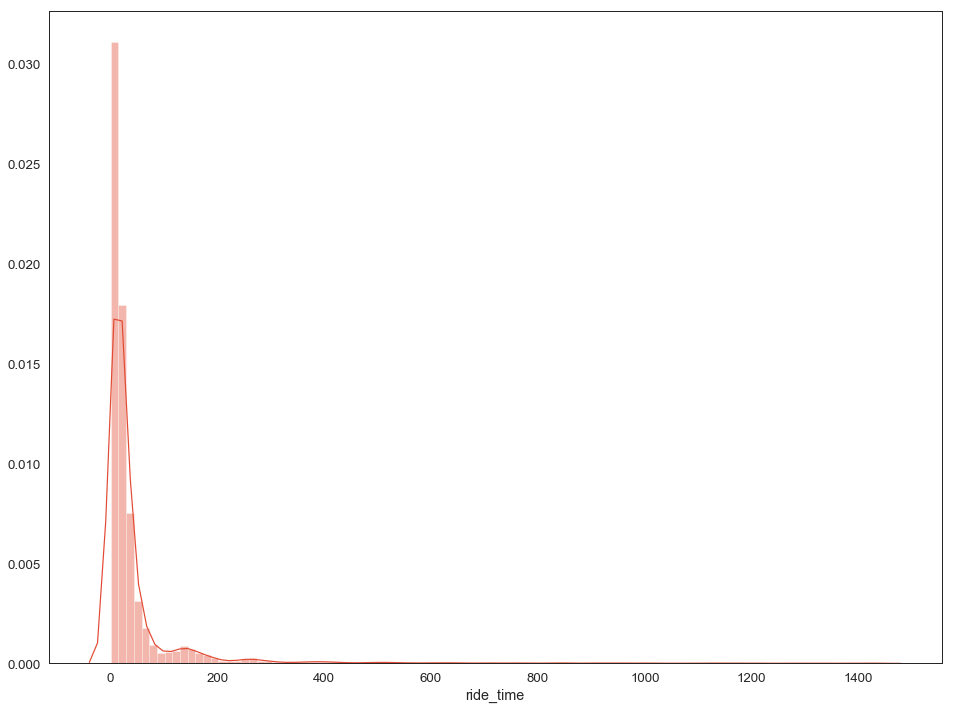

In [19]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 100)

### Using data without 1 min rides

In [20]:
rides = dfc["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
lognorm,2321.494245,-937803.208943,0.044119,0.000024
burr,2119.921644,-866988.656607,0.031860,0.000118
beta,3162.513269,-844499.697749,0.207495,0.000197
norm,5495.060428,-773720.433775,1.047762,0.000989
gamma,37889.786820,-762600.987606,0.803466,0.001273


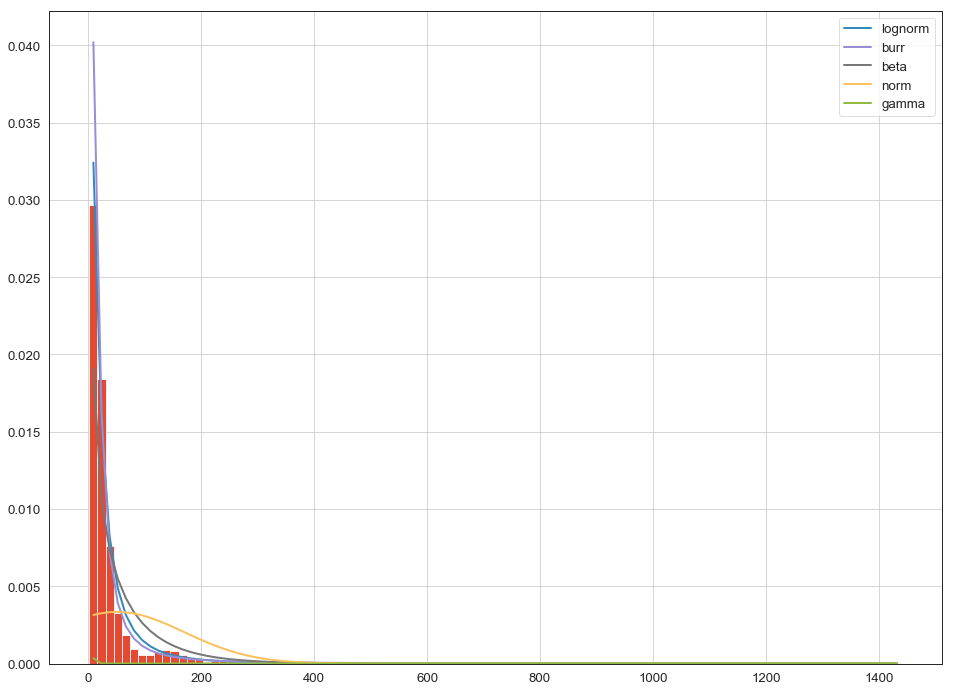

In [21]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [22]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (1.1823515080378701, 1.8744535511980076, 19.749495385440476)}

In [23]:
f.get_best(method = 'aic')

{'burr': (1.2301307101335608,
  20.817234076699837,
  -0.006087169033555849,
  1.2295913751229561)}

In [24]:
f.get_best(method = 'bic')

{'lognorm': (1.1823515080378701, 1.8744535511980076, 19.749495385440476)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2119.921644,-866988.656607,0.031860,0.000118
alpha,2077.745030,-859204.102703,0.032628,0.000141
beta,3162.513269,-844499.697749,0.207495,0.000197
norm,5495.060428,-773720.433775,1.047762,0.000989
bradford,1472.900300,-766463.370089,2.339592,0.001166


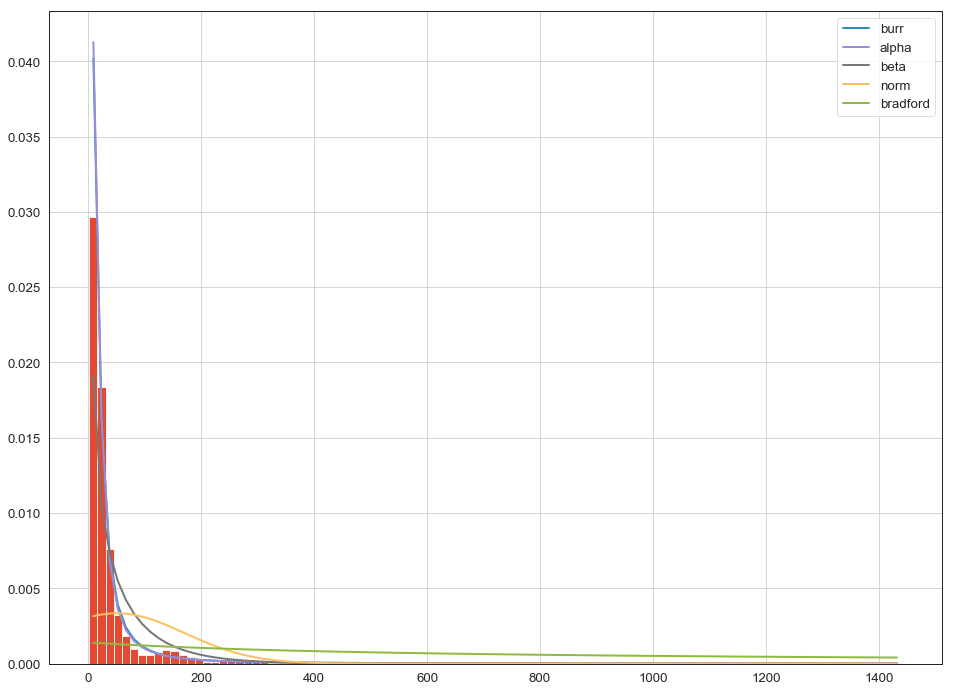

In [25]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3720.512870,-838729.568901,0.249714,0.000225
dgamma,2893.471478,-822419.075820,0.088226,0.000326
chi,4709.998734,-820400.504650,0.354613,0.000342
chi2,1864.184729,-812826.712753,0.438941,0.000406
cosine,1651.251924,-764502.873883,2.352657,0.001220


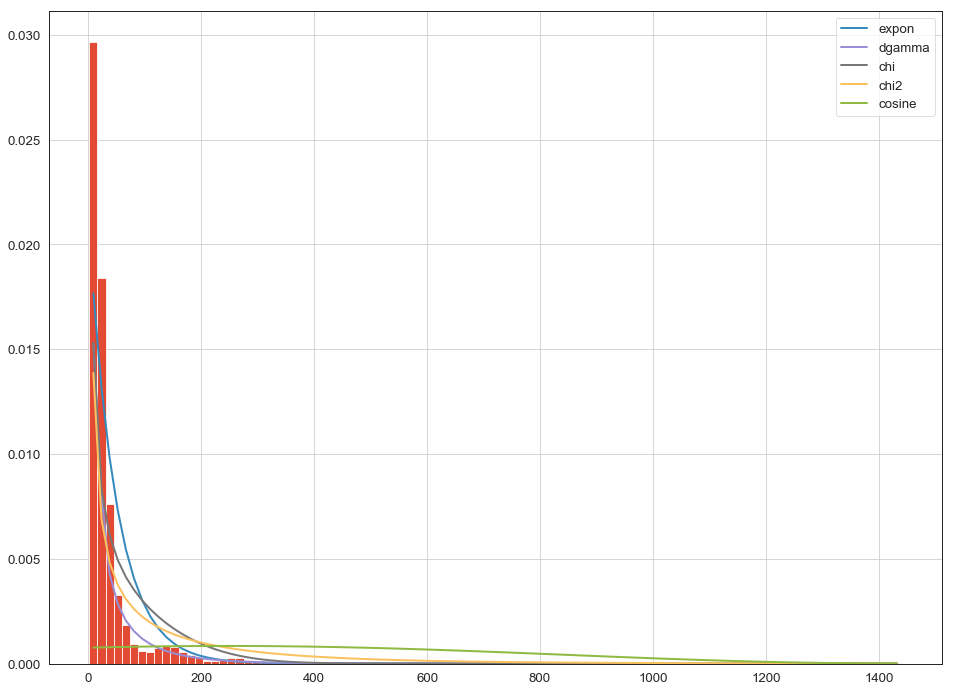

In [26]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fisk,2226.911689,-947688.914315,0.027693,0.000019
fatiguelife,2594.005380,-903374.665755,0.105628,0.000052
f,2125.429683,-871002.336232,0.031524,0.000108
exponnorm,3806.260816,-844325.686728,0.237610,0.000198
gamma,37889.786820,-762600.987606,0.803466,0.001273


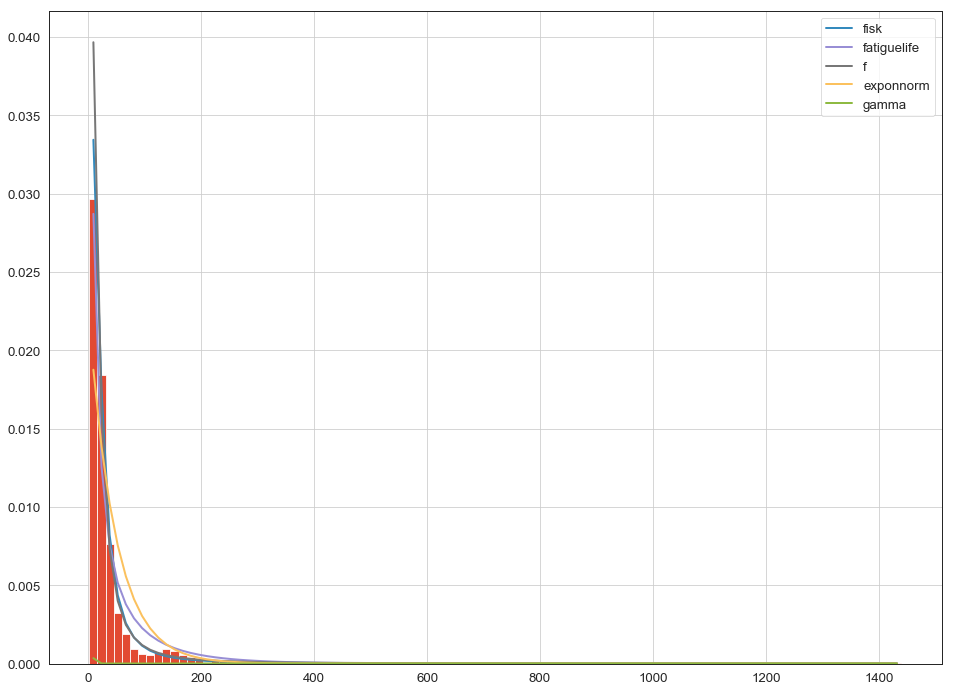

In [27]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2321.494245,-937803.208943,0.044119,0.000024
levy,1829.793184,-886310.320265,0.109975,0.000076
gengamma,2679.827373,-861587.850514,0.147306,0.000134
genexpon,3726.488636,-838696.655808,0.249717,0.000225
loggamma,4885.924538,-772656.520929,1.101167,0.001013


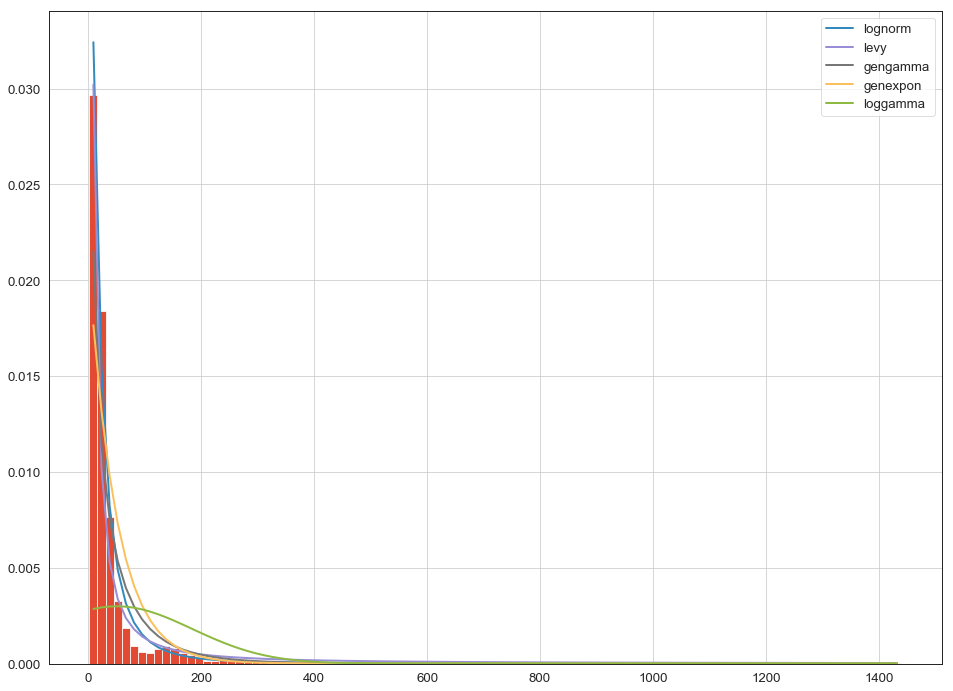

In [28]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2245.574786,-887426.708275,0.049004,0.000074
pearson3,3360.366762,-845588.499076,0.219623,0.000193
pareto,1899.701475,-844001.466833,0.123658,0.000200
logistic,5056.464346,-790749.771915,0.556117,0.000671
powerlaw,1633.653866,-789746.885657,0.981624,0.000687


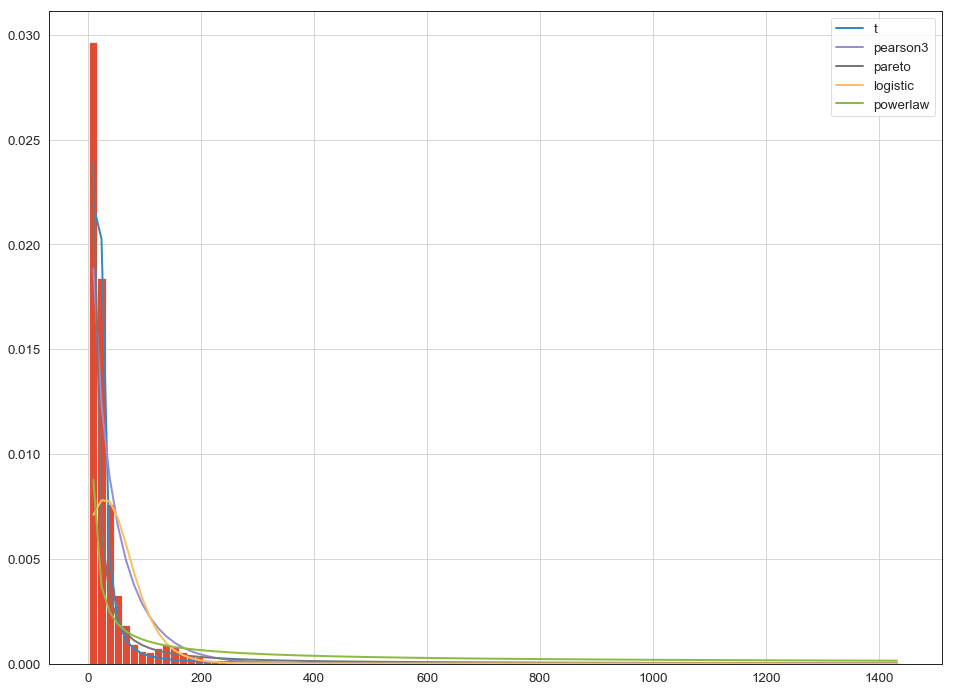

In [29]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
fisk,2226.911689,-947688.914315,0.027693,0.000019
lognorm,2321.494245,-937803.208943,0.044119,0.000024
t,2245.574786,-887426.708275,0.049004,0.000074
burr,2119.921644,-866988.656607,0.031860,0.000118
expon,3720.512870,-838729.568901,0.249714,0.000225


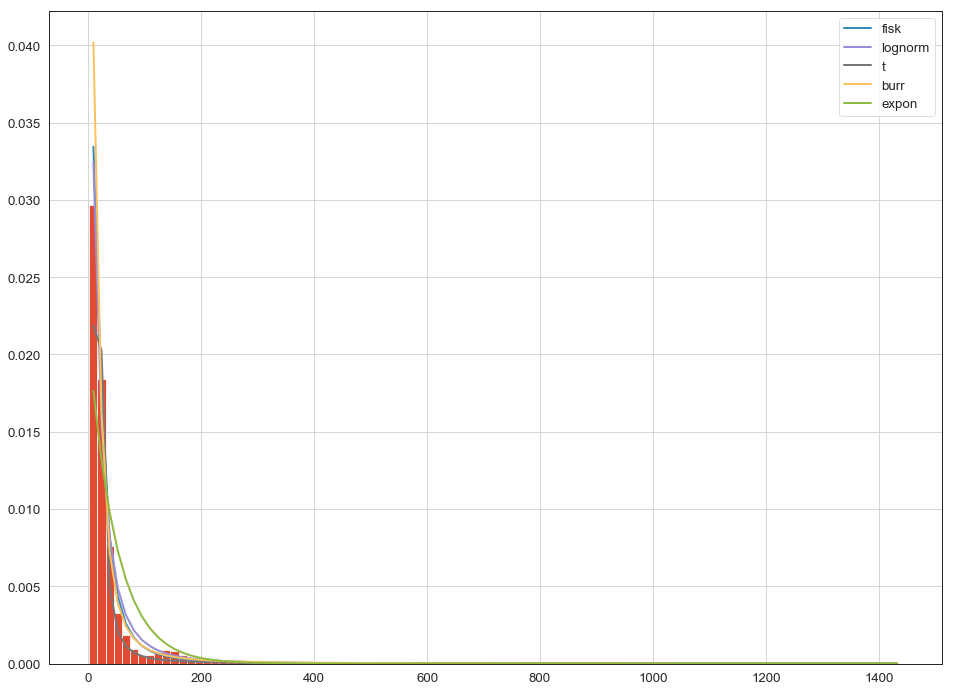

In [40]:
f = Fitter(rides,
           distributions= ['burr','expon','fisk','lognorm','t'])
f.fit()
f.summary()

### 5 distributions without 1 min drop

In [31]:
rides2 = df["ride_time"].values

,aic,bic,kl_div,sumsquare_error
fisk,2134.030185,-1.041175e+06,0.026093,0.000016
burr,2338.543086,-1.029543e+06,0.034385,0.000021
lognorm,2233.249705,-1.018187e+06,0.043640,0.000026
t,2267.488146,-9.645871e+05,0.044880,0.000081
expon,3901.533996,-9.154033e+05,0.242405,0.000226


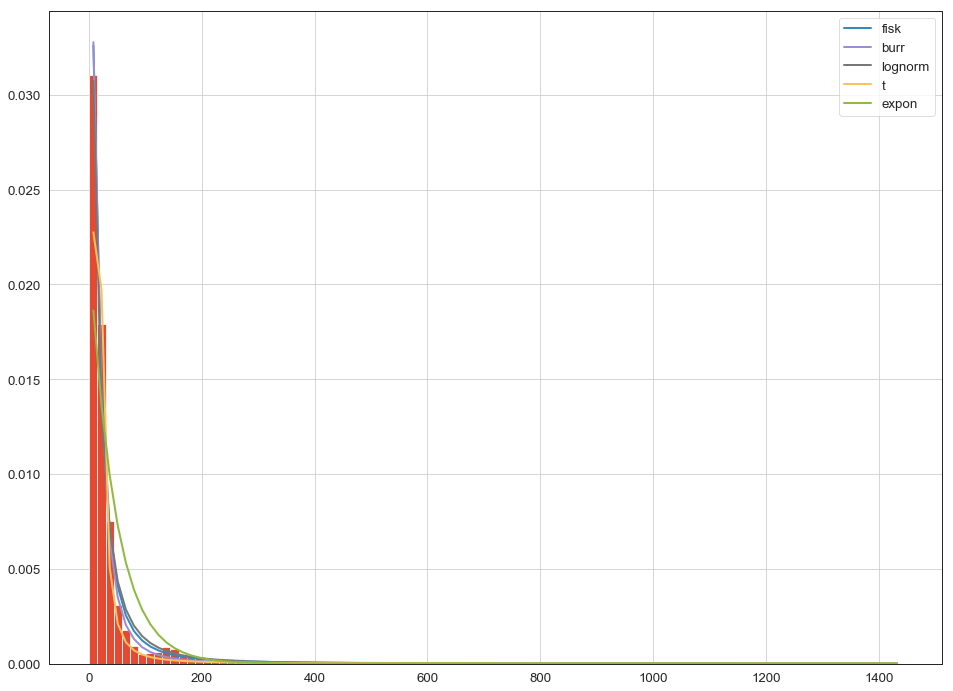

In [41]:
f = Fitter(rides2,
           distributions=['burr','expon','fisk','lognorm','t'])
f.fit()
f.summary()

In [33]:
f.get_best(method = 'sumsquare_error')

{'fisk': (1.3348524501210108, 0.37365898015766164, 17.319041264280273)}

In [34]:
f.get_best(method = 'aic')

{'fisk': (1.3348524501210108, 0.37365898015766164, 17.319041264280273)}

In [35]:
f.get_best(method = 'bic')

{'fisk': (1.3348524501210108, 0.37365898015766164, 17.319041264280273)}

# Appendix

,aic,bic,kl_div,sumsquare_error
beta,2752.396066,-1.280087e+06,inf,1.092061e-07
gamma,2369.284765,-1.270170e+06,inf,1.344375e-07
burr,2309.248646,-1.220700e+06,inf,3.786869e-07
norm,4072.045882,-1.192146e+06,inf,6.888520e-07
lognorm,2395.258044,-1.177982e+06,inf,9.264611e-07


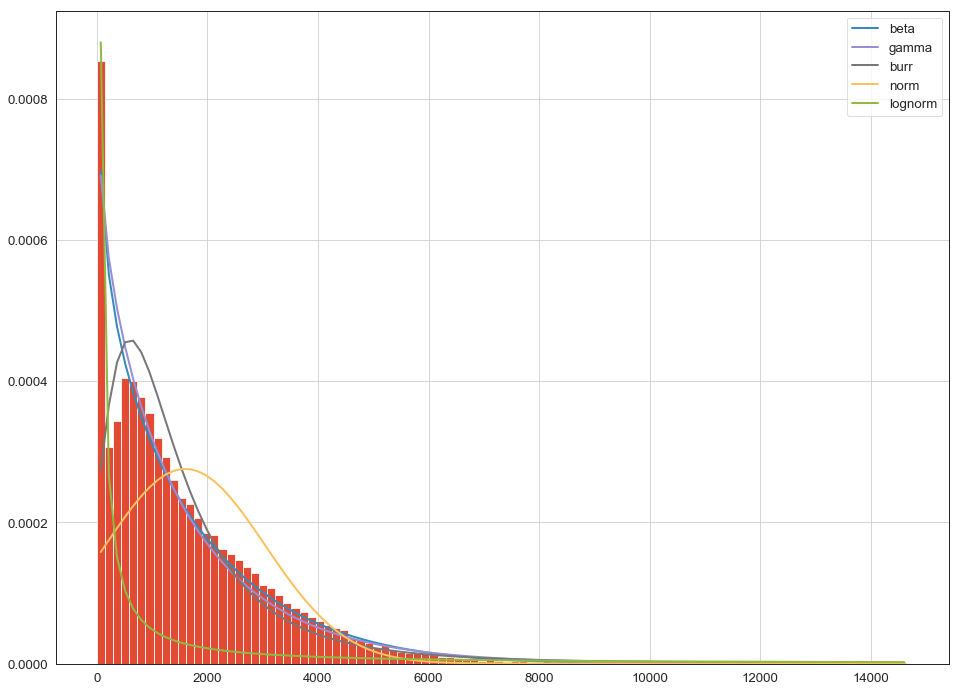

In [36]:
f = Fitter(distance2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
burr,2338.543086,-1.029543e+06,0.034385,0.000021
lognorm,2233.249705,-1.018187e+06,0.043640,0.000026
beta,3916.199291,-9.602874e+05,0.080954,0.000088
norm,5838.258216,-8.425874e+05,1.065898,0.001040
gamma,38493.094969,-8.307179e+05,0.759637,0.001332


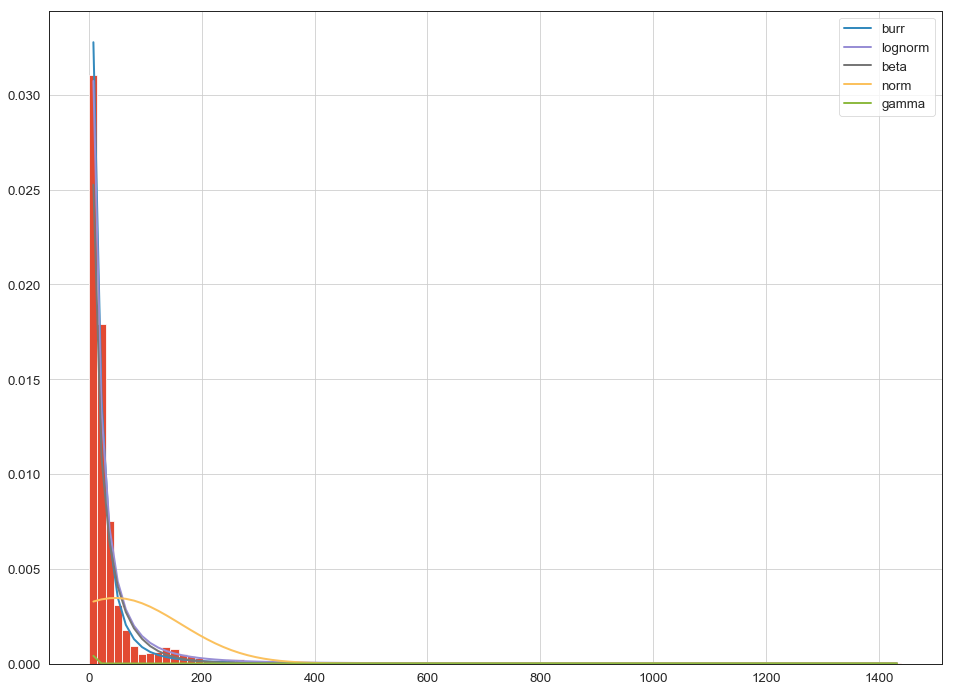

In [37]:
f = Fitter(rides2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()